<a href="https://colab.research.google.com/github/Sagar-Garasangi/sales_Analysis_project/blob/main/store_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url="https://www.dropbox.com/scl/fi/rrtong43hshbe3v8zhr2m/supermarket_sales-Sheet1.csv?rlkey=doql241486getge1gyoh3atj4&st=a066j68v&dl=1"

df=pd.read_csv(url)
print(df.head())
print(df.tail())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

  Branch        Total  gross income  sale_distribution
0      A  106200.3705     5057.1605           0.328828
1      B  106197.6720     5057.0320           0.328819
2      C  110568.7065     5265.1765           0.342353


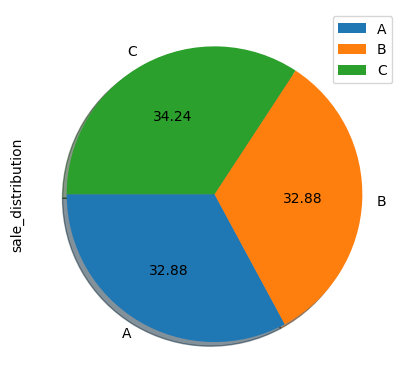

In [ ]:
data=df.groupby(['Branch'],as_index=False)[['Total','gross income']].sum()
#Store sales
data['sale_distribution']=data['Total']/data['Total'].sum()
data['sale_distribution']*100
print(data)
data['sale_distribution'].plot(startangle=180,labels=data['Branch'],kind='pie',shadow=True,legend=True,autopct='%.2f')
plt.show()

        City        Total  gross income  sales_dist_city
0   Mandalay  106197.6720     5057.0320        32.881921
1  Naypyitaw  110568.7065     5265.1765        34.235322
2     Yangon  106200.3705     5057.1605        32.882757


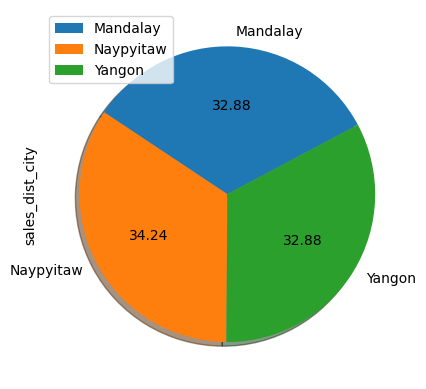

In [ ]:
#sales_dist_city
data=df.groupby('City',as_index=False)[['Total','gross income']].sum()
data['sales_dist_city']=data['Total']/data['Total'].sum()*100
print(data)
data['sales_dist_city'].plot(startangle=28,kind='pie',labels=data['City'],autopct='%.2f',shadow=True,legend=True)
plt.show()

                        Quantity       Total
Product line                                
Food and beverages           952  56144.8440
Sports and travel            920  55122.8265
Electronic accessories       971  54337.5315
Fashion accessories          902  54305.8950
Home and lifestyle           911  53861.9130
Health and beauty            854  49193.7390


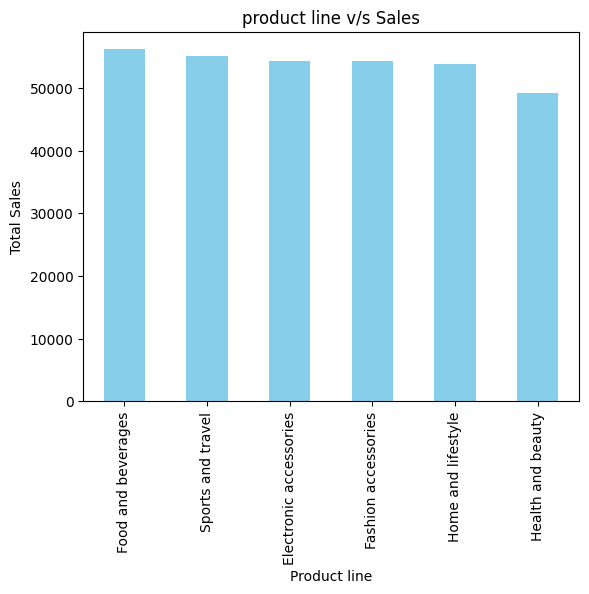

In [ ]:
#prducts v/s Sales
data=df.groupby(['Product line'],as_index=True)[['Quantity','Total']].sum().sort_values('Total',ascending=False)
print(data)
data['Total'].plot(kind='bar',color='skyblue')
plt.ylabel('Total Sales')
plt.title('product line v/s Sales')
plt.show()

         Total            Product line
9   30632.7525       Health and beauty
6   27235.5090  Electronic accessories
11  26548.1055       Sports and travel
7   23868.4950     Fashion accessories
10  23825.0355      Home and lifestyle
8   22973.9265      Food and beverages
        Total            Product line
2  33170.9175      Food and beverages
1  30437.4000     Fashion accessories
4  30036.8775      Home and lifestyle
5  28574.7210       Sports and travel
0  27102.0225  Electronic accessories
3  18560.9865       Health and beauty


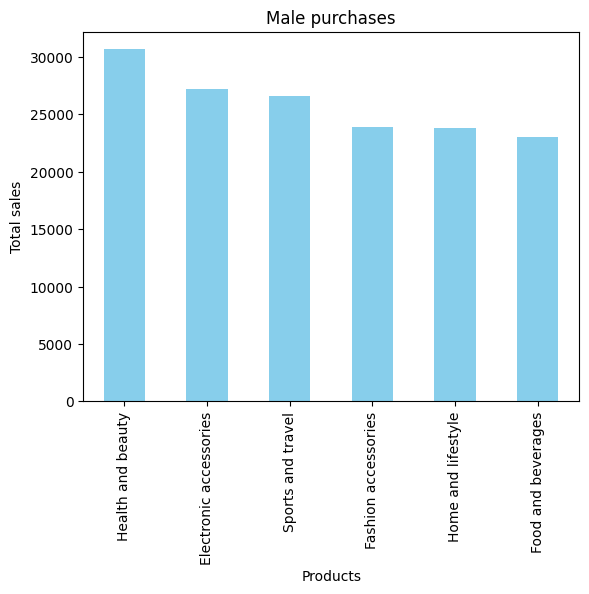

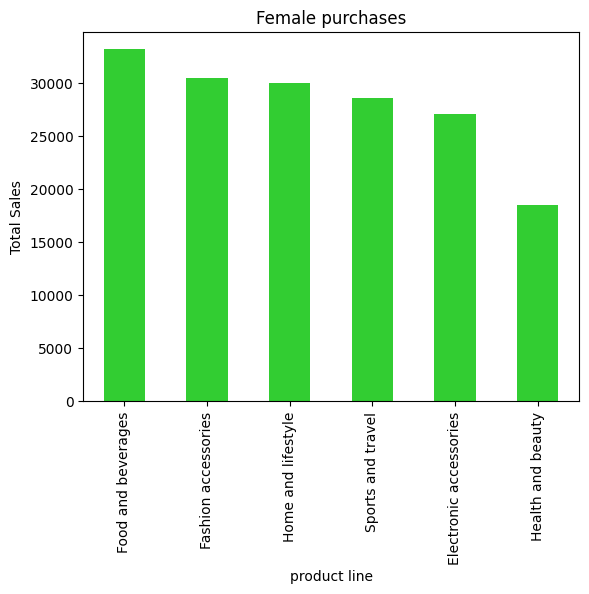

In [ ]:
#Gender bases sales distribution
data=df.groupby(['Gender','Product line'],as_index=False)['Total'].sum()
data_female=data[data['Gender']=='Female'][['Total','Product line']].sort_values('Total',ascending=False)
data_male=data[data['Gender']=='Male'][['Total','Product line']].sort_values('Total',ascending=False)
print(data_male)
print(data_female)
data_male['Total'].plot(kind='bar',color='skyblue')
plt.ylabel('Total sales')
plt.xlabel('Products')
plt.title('Male purchases')
plt.xticks(range(len(data_male)),data_male['Product line'],rotation=90)
plt.show()


data_female['Total'].plot(kind='bar',color='limegreen')
plt.xticks(range(len(data_female)),data_female['Product line'],rotation=90)
plt.ylabel('Total Sales')
plt.xlabel('product line')
plt.title('Female purchases')
plt.show()

Branch
A    312.354031
B    319.872506
C    337.099715
Name: Total, dtype: float64


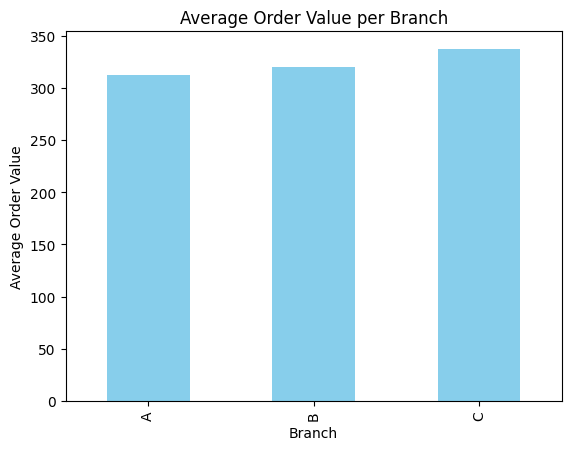

In [ ]:
#avg_order
avg_order_value_per_branch = df.groupby('Branch')['Total'].mean()
print(avg_order_value_per_branch)

avg_order_value_per_branch.plot(kind='bar', color='skyblue')
plt.ylabel('Average Order Value')
plt.xlabel('Branch')
plt.title('Average Order Value per Branch')
plt.show()


                          Rating
Product line                    
Food and beverages      7.113218
Fashion accessories     7.029213
Health and beauty       7.003289
Electronic accessories  6.924706
Sports and travel       6.916265
Home and lifestyle      6.837500


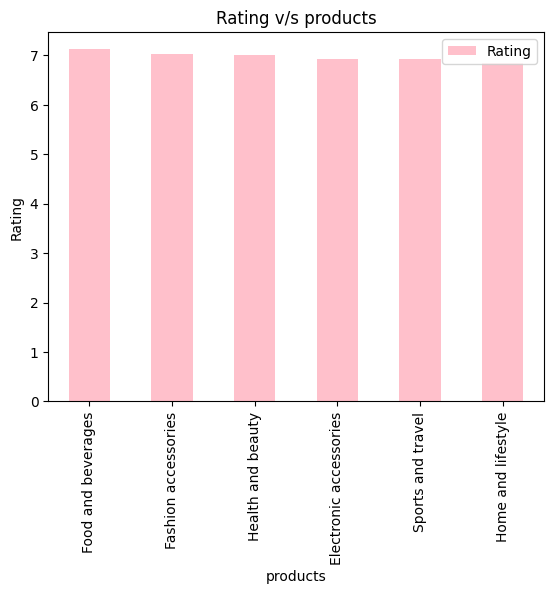

In [ ]:
data=df.groupby('Product line')[['Rating']].mean().sort_values('Rating',ascending=False)
print(data)
data.plot(kind='bar',color='pink')
plt.ylabel('Rating')
plt.xlabel('products')
plt.title('Rating v/s products')
plt.show()

date
2019-01    116291.868
2019-02     97219.374
2019-03    109455.507
Freq: M, Name: Total, dtype: float64


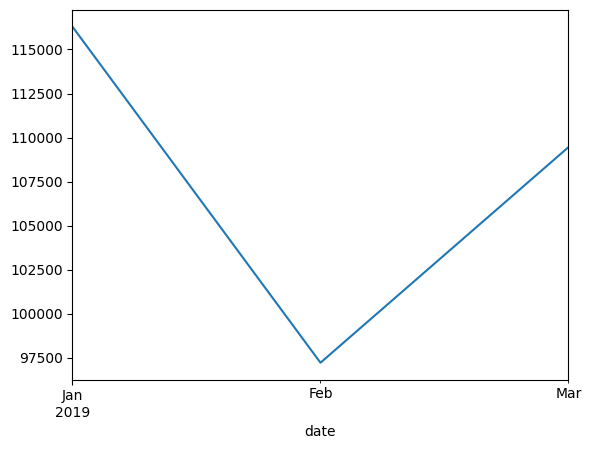

In [ ]:
data=df['date']=pd.to_datetime(df['Date'])
data=df['month']=df.groupby(df['date'].dt.to_period('M'))['Total'].sum()
print(data)
data.plot()
plt.show()


                           Tax 5%
Product line                     
Food and beverages      2673.5640
Sports and travel       2624.8965
Electronic accessories  2587.5015
Fashion accessories     2585.9950
Home and lifestyle      2564.8530
Health and beauty       2342.5590


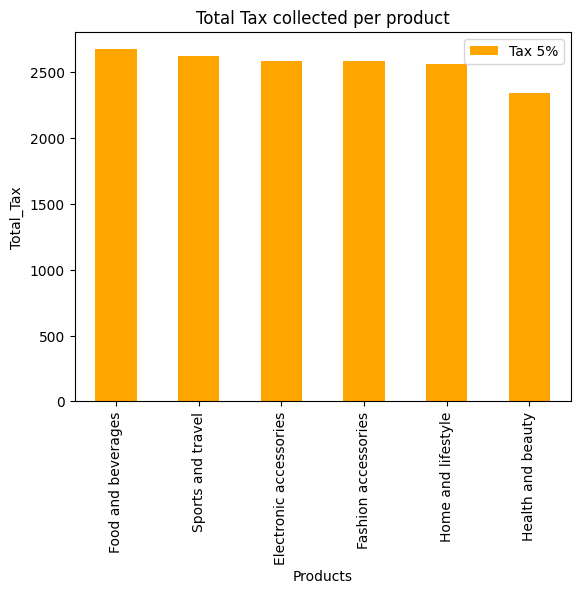

In [ ]:
data_tax=df.groupby('Product line')[['Tax 5%']].agg('sum').sort_values('Tax 5%',ascending=False)
print(data_tax)
data_tax.plot(kind='bar',color='orange')
plt.ylabel('Total_Tax')
plt.xlabel('Products')
plt.title('Total Tax collected per product')
plt.show()


   Customer type            Product line       Total
0         Member  Electronic accessories  24498.4950
1         Member     Fashion accessories  26323.9620
2         Member      Food and beverages  31357.6200
3         Member       Health and beauty  25831.0395
4         Member      Home and lifestyle  27978.0270
5         Member       Sports and travel  28234.3005
6         Normal  Electronic accessories  29839.0365
7         Normal     Fashion accessories  27981.9330
8         Normal      Food and beverages  24787.2240
9         Normal       Health and beauty  23362.6995
10        Normal      Home and lifestyle  25883.8860
11        Normal       Sports and travel  26888.5260


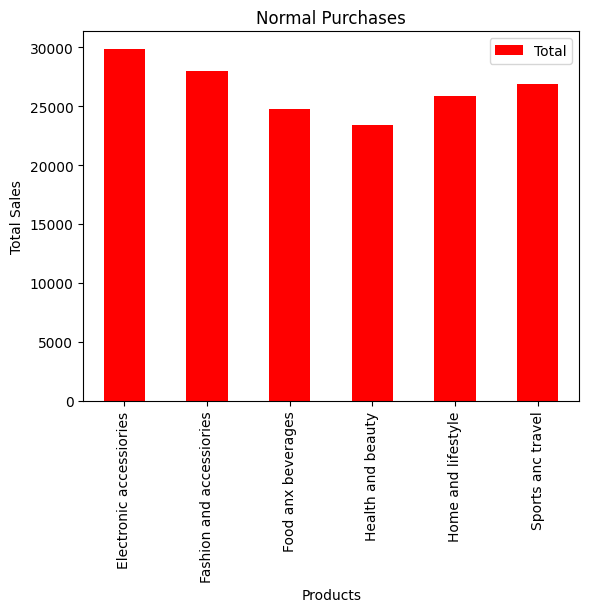

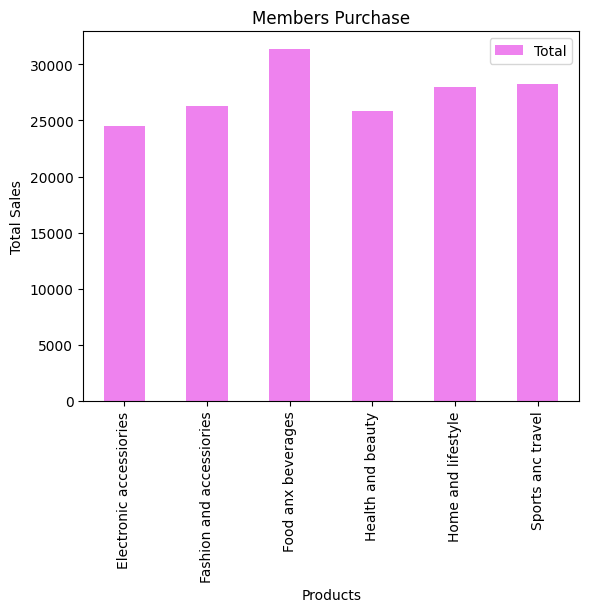

In [ ]:
from re import M
data_type=df.groupby(['Customer type','Product line'],as_index=False)[['Total']].sum()#.sort_values('Total',ascending=False)
print(data_type)
n=["Electronic accessiories","Fashion and accessiories","Food anx beverages","Health and beauty","Home and lifestyle","Sports anc travel"]

data_type[data_type['Customer type']=='Normal'][['Total']].plot(kind='bar',color='red')
plt.ylabel('Total Sales')
plt.xlabel('Products')
plt.title('Normal Purchases')
plt.xticks(range(len(n)),n,rotation=90)
data_type[data_type['Customer type']=='Member'][['Total']].plot(kind='bar',color='violet')
plt.ylabel('Total Sales')
plt.xlabel('Products')
plt.xticks(range(len(n)),n,rotation=90)
plt.title('Members Purchase')
plt.show()

  Customer type       Total  Member_sales  Normal_sales
0        Member  164223.444     50.848406           NaN
1        Normal  158743.305           NaN     49.151594


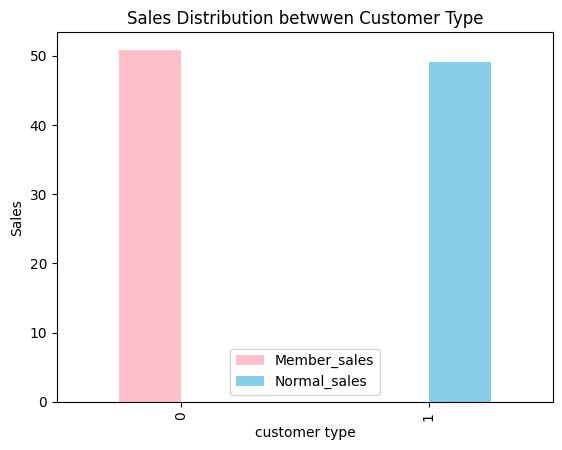

In [ ]:
data_dist=df.groupby('Customer type',as_index=False)[['Total']].sum()
data_dist['Member_sales']=data_dist[data_dist['Customer type']=='Member']['Total']/df['Total'].sum()*100
data_dist['Normal_sales']=data_dist[data_dist['Customer type']=='Normal']['Total']/df['Total'].sum()*100
print(data_dist)
data_dist[['Member_sales','Normal_sales']].plot(kind='bar',color=(['pink','skyblue']))
plt.ylabel('Sales')
plt.xlabel('customer type')
plt.title('Sales Distribution betwwen Customer Type')
plt.show()